In [14]:
from __future__ import print_function

import argparse

import numpy as np
import torch
import torch.utils.data

import make_hierarchical_signals
from model import RecurrentNetContinual

import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
use_cuda = False
torch.manual_seed(1)
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

model = RecurrentNetContinual(n_in=200, n_hid=200, n_out=1,
                                  t_constant=0.3, use_cuda=use_cuda).to(device)
model.load_state_dict(torch.load('./work/04012148_recurrent_memory_fix_inmatrix_pos_neg_epoch_100.pth', map_location='cpu'))


cpu


In [29]:
signals = []
targets = []
for i in range(1):
    signal, target = make_hierarchical_signals.hierarchical_signals(n_episodes=20,
                                                                        stim_dur=10,
                                                                        sig1_stim_dur=10,
                                                                        resp_dur=5,
                                                                        each_episodes=20,
                                                                        spon_rate=0.01)
    signals.append(signal)
    targets.append(target)

signals = np.array(signals)
targets = np.array(targets)

signals = torch.from_numpy(signals)
targets = torch.from_numpy(targets)

hidden = torch.zeros(1, 200, requires_grad=False)
hidden = hidden.to(device)

signals = signals.float()
targets = targets.float()

signals, targets = signals.to(device), targets.to(device)

hidden_list, output, hidden = model(signals, hidden)


In [30]:
print(hidden_list.shape)

torch.Size([1, 900, 200])


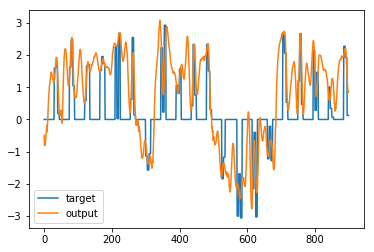

In [31]:
plt.plot(targets[0].data.numpy().T[0], label='target')
plt.plot(output[0].data.numpy().T[0], label='output')
plt.legend()

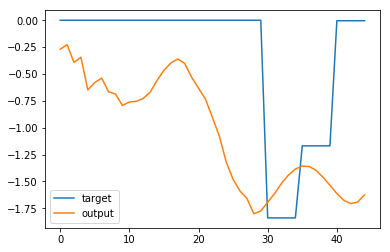

In [32]:
plt.plot(targets[0].data.numpy().T[0][495:540], label='target')
plt.plot(output[0].data.numpy().T[0][495:540], label='output')
plt.legend()

In [33]:
print(hidden_list.data.numpy()[0].T)

[[0.00000000e+00 0.00000000e+00 4.11509350e-02 ... 3.73081952e-01
  4.14385319e-01 4.05759931e-01]
 [3.87117207e-01 6.75714552e-01 6.27235293e-01 ... 5.68935573e-01
  3.98254901e-01 2.93748111e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.39710108e-20
  1.67797077e-20 1.17457951e-20]
 ...
 [8.62231255e-02 1.37296334e-01 1.13315955e-01 ... 8.43455076e-01
  7.08930492e-01 7.09963918e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.49496162e-24
  1.04647310e-24 7.32531158e-25]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.82050466e-12
  5.47435318e-12 3.83204709e-12]]


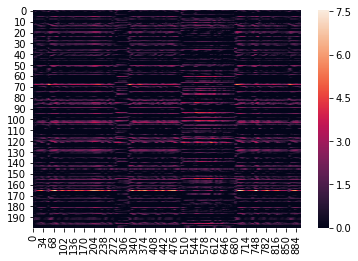

In [34]:
import seaborn as sns
sns.heatmap(hidden_list.data.numpy()[0].T)

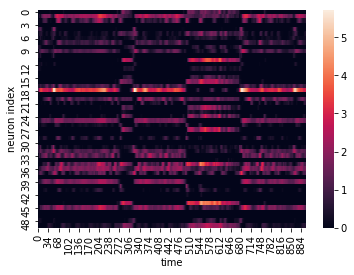

In [35]:
sns.heatmap(hidden_list.data.numpy()[0].T[50:100])
plt.xlabel('time')
plt.ylabel('neuron index')
plt.savefig('internal_dynamics2.png')

Text(0,0.5,'activation')

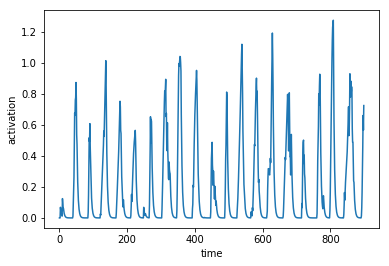

In [36]:
plt.plot(hidden_list.data.numpy()[0].T[7])
plt.xlabel('time')
plt.ylabel('activation')
# plt.savefig('activation2.png')

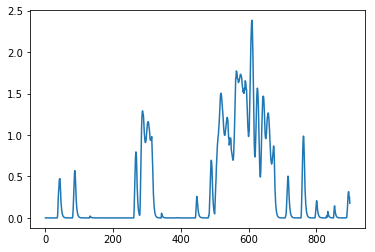

In [37]:
plt.plot(hidden_list.data.numpy()[0].T[9])

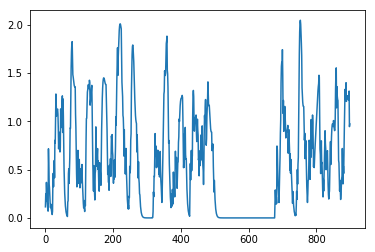

In [38]:
plt.plot(hidden_list.data.numpy()[0].T[12])

Text(0,0.5,'activation')

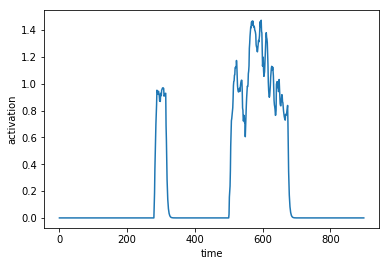

In [39]:
plt.plot(hidden_list.data.numpy()[0].T[16])
plt.xlabel('time')
plt.ylabel('activation')
# plt.savefig('activation1.png')

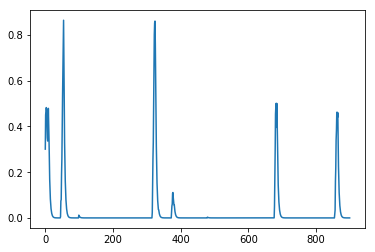

In [40]:
plt.plot(hidden_list.data.numpy()[0].T[27])

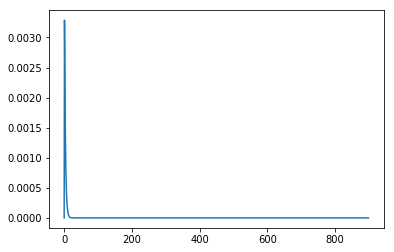

In [41]:
plt.plot(hidden_list.data.numpy()[0].T[30])

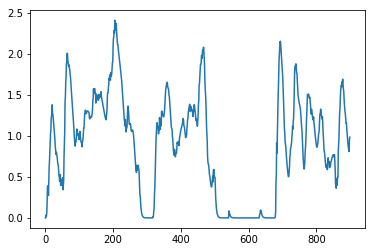

In [42]:
plt.plot(hidden_list.data.numpy()[0].T[31])

Text(33,0.5,'neuron index')

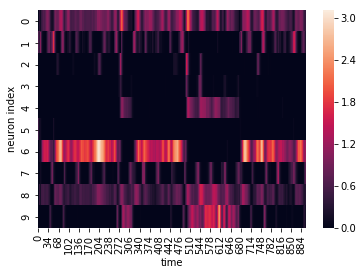

In [43]:
sns.heatmap(hidden_list.data.numpy()[0].T[0:10])
plt.xlabel('time')
plt.ylabel('neuron index')

In [44]:
print(hidden_list.data.numpy()[0].T[0:10, :45].shape)

(10, 45)


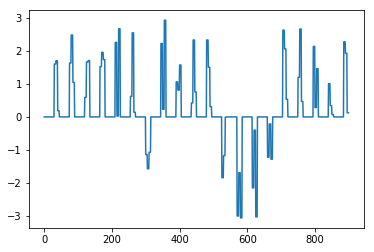

In [45]:
plt.plot(targets[0].data.numpy().T[0], label='target')

Text(0.5,1,'dynamics of neurons during one episode')

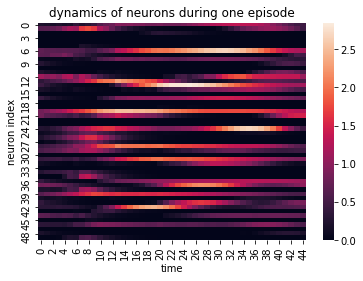

In [46]:
sns.heatmap(hidden_list.data.numpy()[0].T[0:50, 45:90])
plt.xlabel('time')
plt.ylabel('neuron index')
plt.title('dynamics of neurons during one episode')

# plt.savefig('dynamics2.png')

Text(33,0.5,'neuron index')

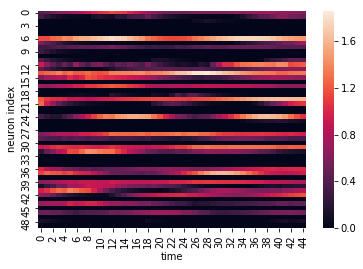

In [47]:
sns.heatmap(hidden_list.data.numpy()[0].T[0:50, 90:135])
plt.xlabel('time')
plt.ylabel('neuron index')

Text(33,0.5,'neuron index')

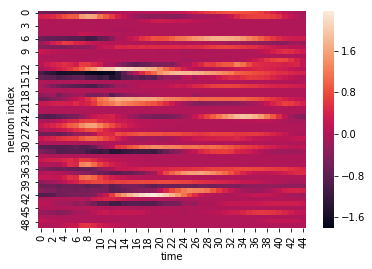

In [48]:
sns.heatmap(hidden_list.data.numpy()[0].T[0:50, 45:90]- hidden_list.data.numpy()[0].T[0:50, 810:855])
plt.xlabel('time')
plt.ylabel('neuron index')

Text(33,0.5,'neuron index')

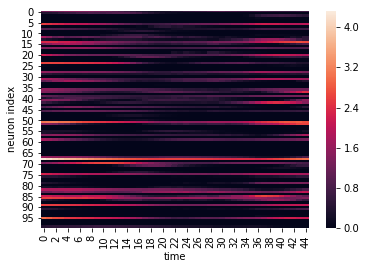

In [49]:
sns.heatmap(hidden_list.data.numpy()[0].T[0:100, 700:745])
plt.xlabel('time')
plt.ylabel('neuron index')

Text(33,0.5,'neuron index')

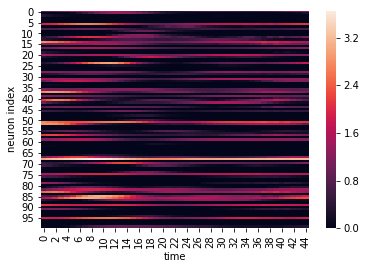

In [50]:
sns.heatmap(hidden_list.data.numpy()[0].T[0:100, 745:790])
plt.xlabel('time')
plt.ylabel('neuron index')

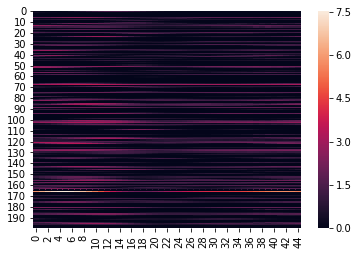

In [51]:
sns.heatmap(hidden_list.data.numpy()[0].T[0:300, 745:790])

Text(0,0.5,'activation')

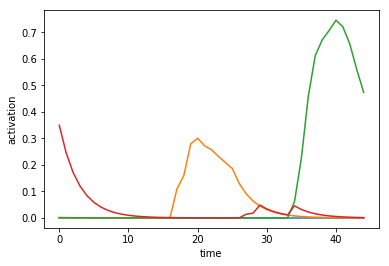

In [52]:
plt.plot(hidden_list.data.numpy()[0].T[2][:45])
plt.plot(hidden_list.data.numpy()[0].T[2][45:90])
plt.plot(hidden_list.data.numpy()[0].T[2][700:745])
plt.plot(hidden_list.data.numpy()[0].T[2][745:790])
plt.xlabel('time')
plt.ylabel('activation')
# plt.savefig('activation2.png')

Text(0,0.5,'activation')

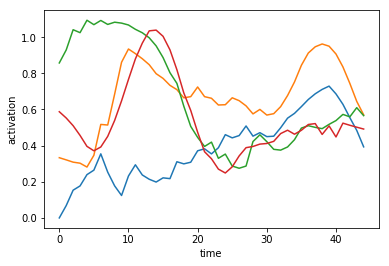

In [53]:
neuron_idx= 46
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][:45])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][45:90])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][700:745])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][745:790])
plt.xlabel('time')
plt.ylabel('activation')
# plt.savefig('activation2.png')

Text(0,0.5,'activation')

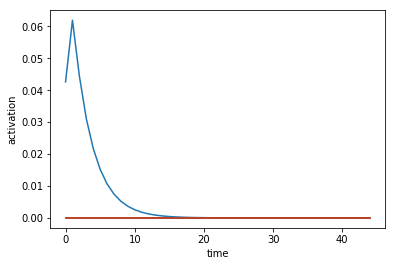

In [54]:
neuron_idx= 47
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][:45])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][45:90])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][700:745])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][745:790])
plt.xlabel('time')
plt.ylabel('activation')

Text(0,0.5,'activation')

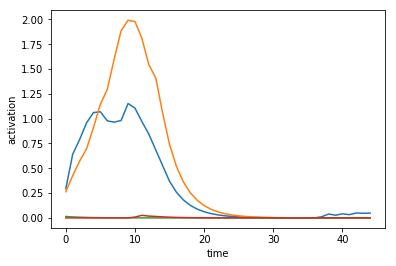

In [55]:
neuron_idx= 54
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][:45])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][45:90])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][700:745])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][745:790])
plt.xlabel('time')
plt.ylabel('activation')

Text(0,0.5,'activation')

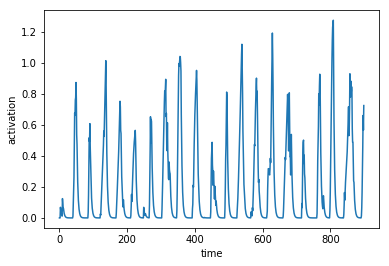

In [56]:
plt.plot(hidden_list.data.numpy()[0].T[7])
plt.xlabel('time')
plt.ylabel('activation')
# plt.savefig('activation2.png')

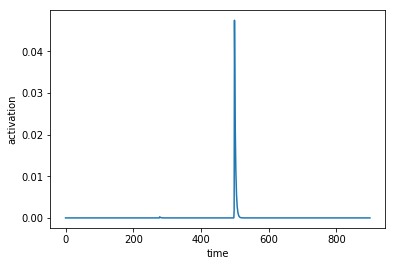

In [57]:
plt.plot(hidden_list.data.numpy()[0].T[53])
plt.xlabel('time')
plt.ylabel('activation')
plt.savefig('activation2.png')

In [58]:
x = np.linspace(0.2, 1, 100)
y = 0.8*x + np.random.randn(100)*0.1
X = np.vstack([x, y]).T
np.random.shuffle(X)

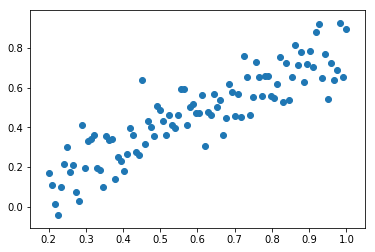

In [59]:
plt.scatter(x,y)

In [60]:
X.shape

(100, 2)

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [62]:
Xd = pca.transform(X)

In [63]:
Xd.shape

(100, 2)

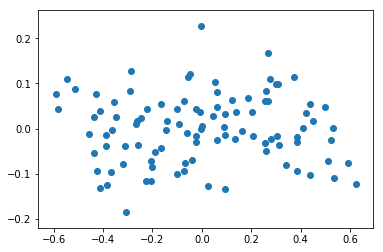

In [64]:
plt.scatter(Xd.T[0], Xd.T[1])

In [66]:
print(hidden_list.data.numpy()[0].shape)

(900, 200)


In [87]:
X = hidden_list.data.numpy()[0]
pca = PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [75]:
Xd = pca.transform(X)

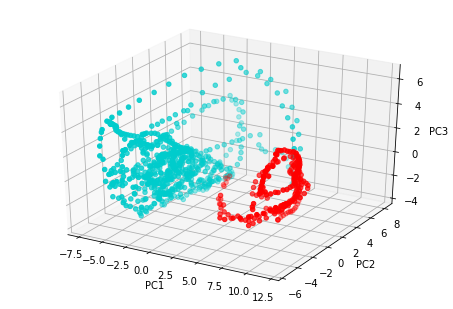

In [80]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

# 軸ラベルの設定
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

ax.scatter(Xd.T[0][:270], Xd.T[1][:270], Xd.T[2][:270],color="#00cccc")
ax.scatter(Xd.T[0][270:315], Xd.T[1][270:315], Xd.T[2][270:315],color="#ff0000")
ax.scatter(Xd.T[0][315:495], Xd.T[1][315:495], Xd.T[2][315:495],color="#00cccc")
ax.scatter(Xd.T[0][495:675], Xd.T[1][495:675], Xd.T[2][495:675],color="#ff0000")
ax.scatter(Xd.T[0][675:], Xd.T[1][675:], Xd.T[2][675:],color="#00cccc")

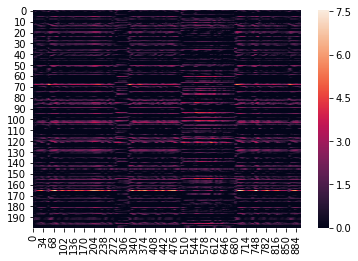

In [79]:
sns.heatmap(hidden_list.data.numpy()[0].T)

In [84]:
X = hidden_list.data.numpy()[0][45:90]
pca = PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [88]:
Xd = pca.transform(X)

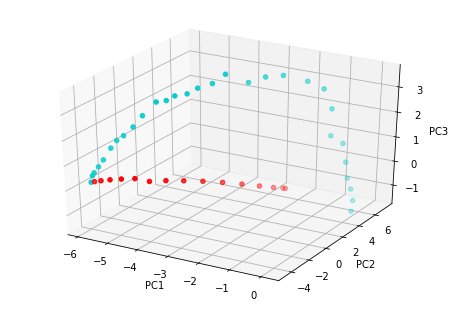

In [90]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

# 軸ラベルの設定
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

ax.scatter(Xd.T[0][45:75], Xd.T[1][45:75], Xd.T[2][45:75],color="#00cccc")
ax.scatter(Xd.T[0][75:90], Xd.T[1][75:90], Xd.T[2][75:90],color="#ff0000")